In [49]:
from api_lib import *
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import pandas as pd
import statistics

%matplotlib inline

In [22]:
data = read_json('orders.json')

In [23]:
def extract_data(parameter1, parameter2 = None, data = data):
    extracted_data = []
    
    if parameter2 is not None:
        for i in range(len(data)):
            data_pair = []
            data_pair.append(data[i][parameter1])
            data_pair.append(data[i][parameter2])
            extracted_data.append(data_pair)
    else:
        for i in range(len(data)):
            extracted_data.append(data[i][parameter1])

    return extracted_data

In [24]:
data[2000]['buyer_user_id']

[33339855, 314556195, 10433585, 108035722, 125927309, 125927309, 654317563, 207506816, 160619904, 5587509, 25727379, 125927309, 185973834, 8107808, 102885331, 134595593, 182780594, 95747975, 44462516, 47222737, 904775177, 150954100, 8675808, 7394321, 492356829, 61277361, 111989895, 6913515, 631906967, 98656525, 113357670, 28032398, 166839693, 42614838, 15430254, 331997129, 546699115, 9192032, 12433992, 544423335, 17110074, 35784151, 35833781, 61963266, 28078392, 75223452, 898327966, 396873198, 45256952, 62981582, 10211034, 897593315, 502273085, 97932153, 20332707, 272973814, 339013052, 64639022, 35905757, 12503197, 35055723, 104658333, 29829218, 67653958, 19943098, 43298922, 61049608, 7116459, 63120807, 240540851, 107373571, 18247574, 615487073, 19678817, 6478297, 715582452, 97932153, 262809962, 88128109, 61277361, 892352255, 89163149, 75003068, 45787992, 675208883, 11544646, 30618807, 97371345, 891550861, 24827282, 14175275, 14163026, 5297504, 8282971, 66971229, 13123476, 61277361, 25

In [45]:
# Number of orders per customer / Repeat vs single orders
buyer_user_id = extract_data("buyer_user_id")

# Time between orders
order_time = extract_data('create_timestamp')

# Geolocation
address = extract_data('first_line')
city = extract_data('city')
state = extract_data('state')
zipcode = extract_data('zip')
country = extract_data('country_iso')

# Order size
id_subtotal_dict = extract_data('buyer_user_id', 'subtotal')

# What products sell best - where
#product_id = extract_data('product_id')

# Number of orders per customers

Counter({1: 1785, 2: 181, 3: 42, 4: 12, 5: 9, 6: 2, 8: 1})
dict_keys([1, 2, 3, 4, 6, 5, 8])
dict_values([1785, 181, 42, 12, 2, 9, 1])


Text(0.5, 1.0, 'How many orders a customer places')

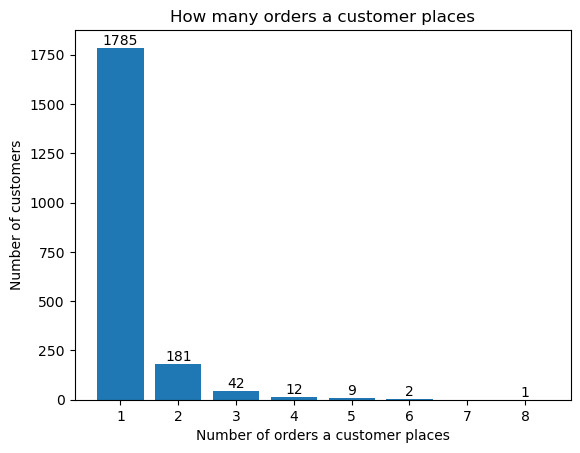

In [30]:
num_orders_by_customers = list(Counter(buyer_user_id).values())

num_orders_by_customers.remove(36)

orders_per_customer = Counter(num_orders_by_customers)

num_reorders = orders_per_customer.keys()
num_customers = orders_per_customer.values()

print(orders_per_customer)

labels = [str(item) for item in list(num_customers)]

print(num_reorders)
print(num_customers)

fig, ax = plt.subplots()
bars = ax.bar(num_reorders, num_customers, label=labels)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.xlabel("Number of orders a customer places")
plt.ylabel("Number of customers")
plt.title("How many orders a customer places")

# Repeat orders vs single orders

([<matplotlib.patches.Wedge at 0x7968d1895c50>,
 [Text(0.9976733393997518, 0.46330109847802836, 'Repeat Orders'),
  Text(-0.9976733610884405, -0.46330105177356823, 'Single Orders')],
 [Text(0.54418545785441, 0.2527096900789245, '13.8%'),
  Text(-0.5441854696846038, -0.25270966460376443, '86.2%')])

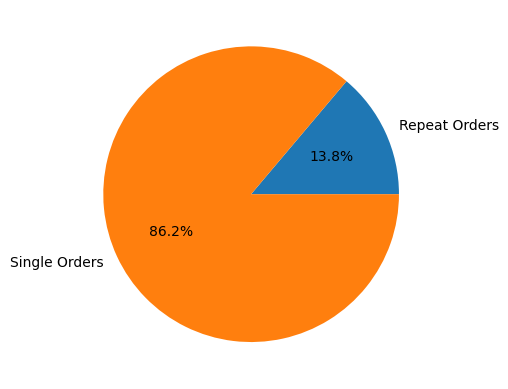

In [27]:
already_assessed = []
repeat_orders = 0
for id in buyer_user_id:
    if id in already_assessed:
        repeat_orders += 1
    already_assessed.append(id)


sizes = [repeat_orders, len(buyer_user_id)]
labels = ["Repeat Orders", "Single Orders"]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# Reorder Size

In [61]:
num_orders_by_id = Counter(buyer_user_id)

id_subtotal = []
for customer in id_subtotal_dict:
    id_subtotal.append([customer[0], customer[1]['amount']/customer[1]['divisor']])

single_order_customers = []
multiple_order_customers = []

for customer in id_subtotal:
    if num_orders_by_id[customer[0]] > 1:
        multiple_order_customers.append(customer[1])
    else:
        single_order_customers.append(customer[1])

print(statistics.mean(single_order_customers))
print(statistics.mean(multiple_order_customers))

print(statistics.median(single_order_customers))
print(statistics.median(multiple_order_customers))

36.61210084033613
37.228963893249606
24.0
24.0


# Time Between orders

In [28]:
from datetime import datetime

for i in range(len(order_time)):
    order_time[i] = datetime.fromtimestamp(order_time[i])


In [29]:

# Find what orders are repeat orders
df = [buyer_user_id, order_time]
print(df)
repeat_orders = []
already_assessed = []
print(len(df))
for id, time in df:
    if id in already_assessed:
        repeat_orders.append([id, time])
    already_assessed.append(id)

[[33339855, 314556195, 10433585, 108035722, 125927309, 125927309, 654317563, 207506816, 160619904, 5587509, 25727379, 125927309, 185973834, 8107808, 102885331, 134595593, 182780594, 95747975, 44462516, 47222737, 904775177, 150954100, 8675808, 7394321, 492356829, 61277361, 111989895, 6913515, 631906967, 98656525, 113357670, 28032398, 166839693, 42614838, 15430254, 331997129, 546699115, 9192032, 12433992, 544423335, 17110074, 35784151, 35833781, 61963266, 28078392, 75223452, 898327966, 396873198, 45256952, 62981582, 10211034, 897593315, 502273085, 97932153, 20332707, 272973814, 339013052, 64639022, 35905757, 12503197, 35055723, 104658333, 29829218, 67653958, 19943098, 43298922, 61049608, 7116459, 63120807, 240540851, 107373571, 18247574, 615487073, 19678817, 6478297, 715582452, 97932153, 262809962, 88128109, 61277361, 892352255, 89163149, 75003068, 45787992, 675208883, 11544646, 30618807, 97371345, 891550861, 24827282, 14175275, 14163026, 5297504, 8282971, 66971229, 13123476, 61277361, 2

ValueError: too many values to unpack (expected 2)

# Geolocation

In [62]:
import pycountry_convert

country_list = Counter(country)
country_list = pd.DataFrame.from_dict(country_list, orient='index').reset_index()
country_list = country_list.rename(columns={"index":"country", 0:"number_of_orders"})
country_list['country'] = country_list.country.apply(lambda x: pycountry_convert.country_name_to_country_alpha3(pycountry_convert.country_alpha2_to_country_name(x)))

/home/akurtz/anaconda3/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/home/akurtz/anaconda3/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [63]:
fig = px.scatter_geo(country_list, locations="country", size="number_of_orders",
                     projection="natural earth")
fig.show()

In [64]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

state_list = Counter(state)
state_list = pd.DataFrame.from_dict(state_list, orient='index').reset_index()
state_list = state_list.rename(columns={"index":"state", 0:"number_of_orders"})
# state_list['country'] = state_list.country.apply(lambda x: pycountry_convert.country_name_to_country_alpha3(pycountry_convert.country_alpha2_to_country_name(x)))
fig = px.choropleth(state_list, locationmode = 'USA-states', locations='state', color='number_of_orders',
                        color_continuous_scale="Greens",
                        range_color=(0, 150),
                        scope="usa",
                        labels={'number_of_orders':'Number of Orders'},
                        )
fig.update_layout(title_text = 'Etsy Orders by State', geo_scope='usa', margin={"r":20,"t":80,"l":0,"b":30})
fig.show()